In [1]:
import time
start_time = time.time()
import os
import numpy as np
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import adam
from keras import models
import cv2
import dlib
import pandas as pd
import matplotlib.pyplot as plt
import sys
import time 
import progressbar
from tqdm.notebook import tqdm_notebook

Using TensorFlow backend.


In [2]:
from sklearn import svm, datasets
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [3]:
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
os.getcwd()

'C:\\Users\\User\\Desktop\\4th_year_AMLS\\AMLS_19-20_ChinYangTan_16053203\\Project_AMLS_19-20_16053203\\B2'

In [5]:
df = pd.read_csv('../Dataset_original_AMLS_19-20/cartoon_set/labels.csv', sep = '\t')
df = df.drop(columns = [df.columns[0]]).drop(columns = [df.columns[2]])
df['eye_color'] = df['eye_color'].apply(str)
df

,eye_color,file_name
0,1,0.png
1,2,1.png
2,2,2.png
3,2,3.png
4,0,4.png
...,...,...
9995,3,9995.png
9996,0,9996.png
9997,1,9997.png
9998,0,9998.png


In [23]:
img = ('../Dataset_original_AMLS_19-20/cartoon_set/img')
# training, testing = train_test_split(df, random_state=0)
training, validating = np.split(df.sample(frac=1), [int(0.9*len(df)),]) #splitting at n-array
# print(training, validating)
# print(training)

In [24]:
# set up data generator
data_generator = ImageDataGenerator(
    rescale = 1./255.,
    validation_split = 0.2,
    horizontal_flip=True,
    vertical_flip=True   
)

# # get batches of training images from the df
# train_generator = data_generator.flow_from_dataframe(
#         dataframe=train_set,
#         x_col="file_name",
#         y_col="face_shape",
#         target_size=(178, 218),
#         batch_size=12,
#         class_mode='categorical')

# validate_generator = data_generator.flow_from_dataframe(
#         dataframe=train_set,
#         x_col="file_name",
#         y_col="face_shape",
#         target_size=(178, 218),
#         batch_size=12,
#         class_mode='categorical')

# Get batches of training dataset from the dataframe
print("Training Dataset Preparation: ")
train_generator = data_generator.flow_from_dataframe(
        dataframe = training, directory = img ,
        x_col = "file_name", y_col = "eye_color",
        class_mode = 'categorical', target_size = (64,64),
        batch_size = 128, subset = 'training') 
   
# Get batches of validation dataset from the dataframe
print("\nValidation Dataset Preparation: ")
validation_generator = data_generator.flow_from_dataframe(
        dataframe = validating, directory = img ,
        x_col = "file_name", y_col = "eye_color",
        class_mode = 'categorical', target_size = (64,64),
        batch_size = 128, subset = 'training')

Training Dataset Preparation: 
Found 7200 validated image filenames belonging to 5 classes.

Validation Dataset Preparation: 
Found 800 validated image filenames belonging to 5 classes.


In [25]:
#put under a def

In [28]:
# starting point 
my_model= models.Sequential()

# my_model.add(Dropout(0.2, input_shape=(64,64,3))) #height, width, depth
# Add first convolutional block
my_model.add(Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=(64,64,3))) 
my_model.add(MaxPooling2D((2, 2), padding='same'))
# second block
my_model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #Convolution: filters, kernel_size that specifies the height and width of the 2D convolution window, p padding layers so dimensions of input = output
my_model.add(MaxPooling2D((2, 2), padding='same'))
# third block
my_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D((2, 2), padding='same'))
# fourth block
my_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D((2, 2), padding='same'))
# global average pooling
# my_model.add(GlobalAveragePooling2D())
# fully connected layer
# my_model.add(Dense(64, activation='relu'))
# my_model.add(BatchNormalization())
# make predictions
my_model.add(Flatten())
my_model.add(Dense(5, activation='softmax'))
# Show a summary of the model. Check the number of trainable parameters
my_model.summary()
my_model.compile(optimizer='adam', loss='categorical_crossentropy', 
                 metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 128)        

In [29]:
#copy in main function

In [30]:
history = my_model.fit_generator(
                                train_generator,
                                epochs=25,
                                steps_per_epoch=train_generator.samples // train_generator.batch_size,
                                validation_data=validation_generator,
                                validation_steps=validation_generator.samples // validation_generator.batch_size
                                )

Epoch 1/25
56/56 [==============================] - 165s 3s/step - loss: 1.6059 - accuracy: 0.2096 - val_loss: 1.5593 - val_accuracy: 0.2266
Epoch 2/25
56/56 [==============================] - 90s 2s/step - loss: 1.3297 - accuracy: 0.4048 - val_loss: 1.2246 - val_accuracy: 0.5193
Epoch 3/25
56/56 [==============================] - 88s 2s/step - loss: 1.0849 - accuracy: 0.5926 - val_loss: 0.8676 - val_accuracy: 0.7604
Epoch 4/25
56/56 [==============================] - 80s 1s/step - loss: 0.7817 - accuracy: 0.7559 - val_loss: 0.6215 - val_accuracy: 0.8065
Epoch 5/25
56/56 [==============================] - 64s 1s/step - loss: 0.5502 - accuracy: 0.8085 - val_loss: 0.3853 - val_accuracy: 0.8408
Epoch 6/25
56/56 [==============================] - 46s 813ms/step - loss: 0.4600 - accuracy: 0.8235 - val_loss: 0.2822 - val_accuracy: 0.8408
Epoch 7/25
56/56 [==============================] - 43s 773ms/step - loss: 0.4157 - accuracy: 0.8224 - val_loss: 0.5172 - val_accuracy: 0.8274
Epoch 8/25
56

In [56]:
from matplotlib.lines import Line2D

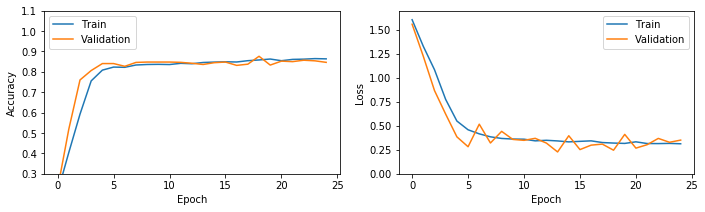

In [62]:
plt.figure(figsize=(18, 3))

plt.subplot(131)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim([.3,1.1])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(132)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim([0,1.7])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.savefig("Custom_Keras_ODSC.png", dpi=300)

In [32]:
from keras.models import load_model

modelFile = 'my_CNN.h5'

my_model.save(modelFile)

In [72]:
from sklearn.metrics import accuracy_score

In [ ]:
tr_sc = accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)[source]¶

In [33]:
df2 = pd.read_csv('../Dataset_test_AMLS_19-20/cartoon_set_test/labels.csv', sep = '\t')
df2 = df2.drop(columns = [df2.columns[0]]).drop(columns = [df2.columns[2]])
df2['eye_color'] = df2['eye_color'].apply(str)
df2

,eye_color,file_name
0,2,0.png
1,1,1.png
2,0,2.png
3,0,3.png
4,3,4.png
...,...,...
2495,4,2495.png
2496,2,2496.png
2497,2,2497.png
2498,4,2498.png


In [34]:
img = ('../Dataset_test_AMLS_19-20/cartoon_set_test/img')

In [35]:
# saved_model = load_model(modelFile)
# test_generator = data_generator.flow_from_dataframe(
#         dataframe = testing, directory = img,
#         x_col = "file_name", y_col = "eye_color",
#         batch_size=1,
#         class_mode='categorical', target_size=(64, 64),
#         shuffle=False)
# test_steps = test_generator.samples
# print(test_steps)

saved_model = load_model(modelFile)
test_generator = data_generator.flow_from_dataframe(
        dataframe = df2, directory = img,
        x_col = "file_name", y_col = "eye_color",
        batch_size=1,
        class_mode='categorical', target_size=(64, 64),
        shuffle=False)
test_steps = test_generator.samples
print(test_steps)

Found 2500 validated image filenames belonging to 5 classes.
2500


In [75]:
tr_sc = saved_model.evaluate_generator(train_generator, steps = validation_generator.samples // 32, verbose=1)

print('Train loss: '+ str(tr_sc[0]))
print('Train Accuracy: '+ str(tr_sc[1]))

25/25 [==============================] - 28s 1s/step
Train loss: 0.32701995968818665
Train Accuracy: 0.8731250166893005


In [77]:
val_sc = saved_model.evaluate_generator(validation_generator, steps = validation_generator.samples // 32, verbose=1)

print('Validation loss: '+ str(val_sc[0]))
print('Validation Accuracy: '+ str(val_sc[1]))

25/25 [==============================] - 25s 1s/step
Validation loss: 0.27565526962280273
Validation Accuracy: 0.8492445349693298


In [36]:
#convert to .py file
#calling .py file
#doesn't have to show results
#import x
#from x import *

In [37]:
test_generator.reset()
pred=saved_model.predict_generator(test_generator, verbose=1, steps=test_steps)
# determine the maximum activation value for each sample
predicted_class_indices=np.argmax(pred,axis=1)
# print(predicted_class_indices)
# label each predicted value to correct gender
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

2500/2500 [==============================] - 19s 8ms/step


In [38]:
import sklearn.metrics as metrics

In [39]:
#paste plt.show()

[[395  24   7  41  39]
 [  3 408   7  38  27]
 [ 12  30 422  31  30]
 [ 12  31   2 445  24]
 [ 12  18   6  25 411]]

Confusion Matrix


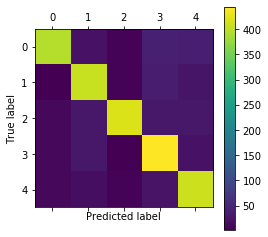

[[0.158  0.0096 0.0028 0.0164 0.0156]
 [0.0012 0.1632 0.0028 0.0152 0.0108]
 [0.0048 0.012  0.1688 0.0124 0.012 ]
 [0.0048 0.0124 0.0008 0.178  0.0096]
 [0.0048 0.0072 0.0024 0.01   0.1644]]

Confusion Matrix (normalised)


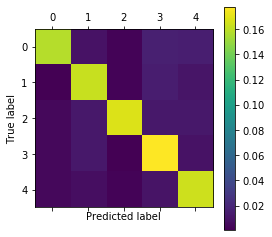

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       506
           1       0.80      0.84      0.82       483
           2       0.95      0.80      0.87       525
           3       0.77      0.87      0.81       514
           4       0.77      0.87      0.82       472

    accuracy                           0.83      2500
   macro avg       0.84      0.83      0.83      2500
weighted avg       0.84      0.83      0.83      2500

Accuracy achieved: 0.8324 ♡♡♡


In [40]:
cm = confusion_matrix(test_generator.classes, predicted_class_indices)

print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()


cm2 = confusion_matrix(test_generator.classes, predicted_class_indices, normalize='all')

print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix (normalised)')
plt.show()

print('Classification Report\n')
print(classification_report(test_generator.classes, predicted_class_indices))
print('Accuracy achieved:', accuracy_score(test_generator.classes, predicted_class_indices), '\u2661''\u2661''\u2661')

In [41]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 3769.0476756095886 seconds ---
